Importing necessary Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Using pandas to create an Data Frame ( DF ) from an CSV file

In [2]:
df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

Getting the number or rows and columns in the df

In [3]:
df.shape

(60000, 785)

head() displays the first 5 records from the DF similarly tail() can be used to view last 5 elements

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This part is for visualizing the first row in the data to get and understanding of how the images look

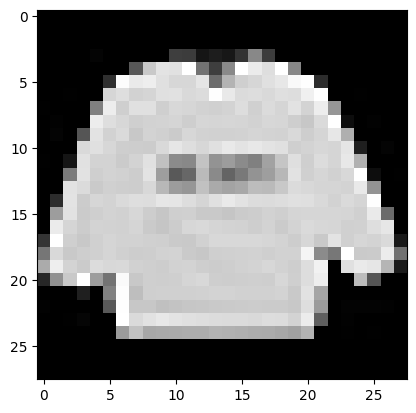

In [5]:
current_image=df.iloc[0,1:785]
current_image=np.array(current_image)
current_image = current_image.reshape((28, 28))
current_image = current_image.astype('float32') / 255  # Normalize
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()


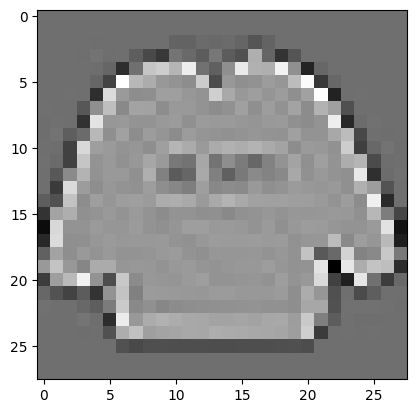

In [6]:
import cv2

# Assuming current_image is your reshaped image data
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(current_image, -1, kernel)

plt.gray()
plt.imshow(sharpened_image, interpolation='nearest')
plt.show()


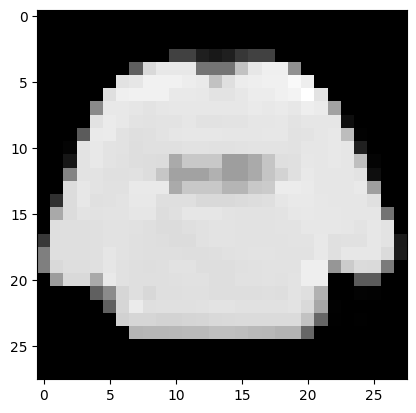

In [7]:
from scipy import signal

denoised_image = signal.medfilt(current_image, kernel_size=3)  # Adjust kernel size as needed

plt.gray()
plt.imshow(denoised_image, interpolation='nearest')
plt.show()


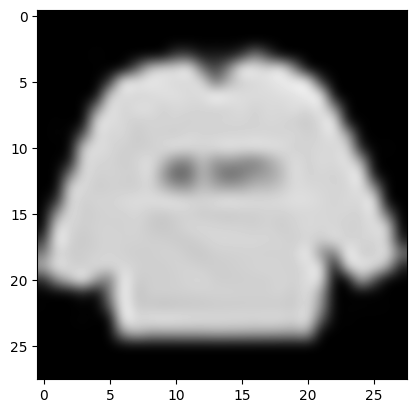

In [8]:
plt.imshow(current_image, interpolation='bicubic')
plt.show()


In [9]:
m,n=df.shape

In [10]:
print(m,n)

60000 785


Here the data frame is converted into an numpy array

This enables us to Manipulate data

In [11]:
df=np.array(df)
df

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

we Shuffle the rows randomly this make sure the rows are not in any particular order (asscending or descendin)

In [12]:
df.shape
np.random.shuffle(df)

This part will split the train and test part we will generally go for an 80-20 split

In [13]:
dev_train=df[0:52500].T
x_train=dev_train[1:n]
y_train=dev_train[0]
x_train=x_train/255

In [14]:
dev_train

array([[7, 4, 3, ..., 8, 5, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
dev_test=df[52500:m].T
x_test=dev_test[1:n]
y_test=dev_test[0]
x_test=x_test/255

# Neural Network Structure #

### This neural network has 4 layers

#### Layer 1:
- Input Layer
- This has 784 neurons
- only responsibility is to provide input to the next layer

### Layer 2:
- 1st Hidden layer also known as Dense layer
- This layer consist of 128 neurons
- 2nd layer applays an weight an bias to values passed by Input layer (this will be done in all layers except in input layer)
- we use Relu activation function in this layer
- Range : [0 , ∞]

### Layer 3
- 2nd Hidden Layer
- This layer consist of 32 neurons
- usue Lrelu activation function 
- Range : [ -∞ , ∞ ]

### Layer 4
- This is known as the output layer
- This is where the outputs are decided
- This layer consist of 10 neurons each representing an particular output
- This uses Softmax activation function
- Range : [0, 1]

This section first initializes the weights and bias randomly

In [16]:
def init():
    w1=np.random.rand(128, 784)-.5
    b1=np.random.rand(128, 1)-.5
    w2=np.random.rand(32, 128)-.5
    b2=np.random.rand(32, 1)-.5
    w3=np.random.rand(10, 32)-.5
    b3=np.random.rand(10, 1)-.5
    
    return w1 , b1 , w2 , b2 , w3 , b3

Activation function of 2nd layer

In [17]:
def Relu(z):
    return np.maximum(0,z)

Activation function of layer 3

In [18]:
def LRelu(z):
    return np.maximum(0.01*z,z)

Activation function of layer 4 (final output layer)

In [19]:
def softmax(z):
    A=np.exp(z)/sum(np.exp(z))
    return A

The model tries to predict the exact output based on the weights and bias

In [20]:
def forward_prop(w1, w2, w3, b1, b2, b3, x):
    z1=w1.dot(x)+b1
    A1=Relu(z1)
    z2=w2.dot(A1)+b2
    A2=LRelu(z2)
    z3=w3.dot(A2)+b3
    A3=softmax(z3)
    
    return z1, z2, z3, A1, A2, A3

The desired output is encoded in the format of one hot encode 

In [21]:
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y= one_hot_Y.T
    
    return one_hot_Y

Deactivstion function of layer 2

In [22]:
def d_Relu(z):
    return z>0

Deactivation function of layer 3

In [23]:
def d_LRelu(z):
    return np.where(z >= 0, 1, 0.01)

The Back propogation finds the error made in the forward propogation. <br/><br/>  This includes :
- The error contributed by each layer
- The error contributed by the weights in each layer
- The error contributed by the bias in each layer

In [24]:
def backprop(z1, z2, z3, A1, A2, A3, w1, w2, w3, x, y):
    m=y.size
    one_hot_Y=one_hot(y)
    
    dz3=A3-one_hot_Y
    dw3=1/m*dz3.dot(A2.T)
    db3=1/m*np.sum(dz3)
    
    dz2=w3.T.dot(dz3)*d_LRelu(z2)
    dw2=1/m*dz2.dot(A1.T)
    db2=1/m*np.sum(dz2)
    
    dz1=w2.T.dot(dz2)*d_Relu(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    
    return dz1, dz2, dz3, dw1, dw2, dw3, db1, db2, db3
    

This layer updates the Weights and bias based on the error contributed by them 

In [25]:
def updates(w1, w2, w3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, alpha):
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    w3 = w3 - alpha * dw3
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    b3 = b3 - alpha * db3
    
    return w1, w2, w3, b1, b2, b3

An function to find accuracy 

In [26]:
def get_prediction(A3):
    return np.argmax(A3,0)

def get_accuracy(prediction, y):
    print(prediction, y)
    return np.sum(prediction == y) / y.size

This function intitilizes the model


In [27]:
def gradiant_descent(x,y,iterations, alpha):
    w1, b1, w2, b2, w3, b3 = init()
    for i in range(iterations+1):
        z1, z2, z3, A1, A2, A3 = forward_prop(w1, w2, w3, b1, b2, b3, x)
        dz1, dz2, dz3, dw1, dw2, dw3, db1, db2, db3 = backprop(z1, z2, z3, A1, A2, A3, w1, w2, w3, x, y)
        w1, w2, w3, b1, b2, b3 = updates(w1, w2, w3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, alpha)
        if i % 50 == 0:
            print("Iteration: ",i)
            print("Accuracy: ", get_accuracy(get_prediction(A3),y))
    return w1, b1, w2, b2, w3, b3

In [29]:
w1, b1, w2, b2, w3, b3 = gradiant_descent(x_train, y_train, 500, 0.30)


Iteration:  0
[0 1 1 ... 1 0 1] [7 4 3 ... 8 5 3]
Accuracy:  0.08081904761904762
Iteration:  50
[7 2 3 ... 8 9 3] [7 4 3 ... 8 5 3]
Accuracy:  0.45758095238095237
Iteration:  250
[7 4 3 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.7629333333333334
Iteration:  300
[7 4 3 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.7766857142857143
Iteration:  350
[7 4 3 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.7876761904761905
Iteration:  400
[7 4 4 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.7946857142857143
Iteration:  450
[7 4 4 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.803847619047619
Iteration:  500
[7 4 4 ... 8 7 3] [7 4 3 ... 8 5 3]
Accuracy:  0.8057333333333333
